# Doge Coin Analysis
<big>The goal of this notebook is to take a closer look at the financial history of Doge coin. We will use the data from DOGE-USD.csv file for this purpose.
The dataset was downloaded from [kaggle](https://www.kaggle.com/), so it probably does not have many missing values or invalid values. However we will still check the validity of the data and if necessary we will reform it.The cleaning will be conducted in the first part, while in the second part we will visualize some relations between the data.</big>

## Part 1: Data Inspection & Cleaning

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# reading the data
PATH = "data/DOGE-USD.csv"
df = pd.read_csv(PATH)
df.head()

,Date,Open,High,Low,Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,6259550
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,4246520
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,2231080
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,3288960
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,2481270


In [7]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [10]:
df['Date'] = pd.to_datetime(df['Date'])   # we change the Date column from string to Date
df.set_index('Date', inplace=True)    # we will also set the Date as index, since most of our plots will be based on date
print("Shape:", df.shape)  # we also take a look at the shape of the dataframe

Shape: (1532, 5)


In [11]:
# to get some statistical info
df.describe()

,Open,High,Low,Close,Volume
count,1532.000000,1532.000000,1532.000000,1532.000000,1.532000e+03
mean,0.053032,0.056574,0.049593,0.053151,1.049954e+09
std,0.106257,0.114770,0.097944,0.106358,3.809881e+09
min,0.001046,0.001210,0.001002,0.001038,1.431720e+06
25%,0.002494,0.002551,0.002430,0.002495,1.965492e+07
50%,0.003161,0.003260,0.003059,0.003162,6.806869e+07
75%,0.009115,0.009615,0.008515,0.009195,2.837324e+08
max,0.687801,0.737567,0.608168,0.684777,6.941068e+10


In [14]:
# now to check if we have any missing values
df[df.isna() == True].count()

Open      0
High      0
Low       0
Close     0
Volume    0
EMA50     0
EMA200    0
dtype: int64

In [15]:
df.nunique()   # let's see how many unique values each column has

Open      1306
High      1310
Low       1299
Close     1315
Volume    1532
EMA50     1532
EMA200    1532
dtype: int64

In [12]:
# we would like to have an EMA to better inspect the course of doge coin

def get_EMA(n, data):   # first we define a function for the creation of EMA
    '''
    This function takes a number of days n, and a dataframe,
    and computes the EMAn of the closing price of the df. For
    the first n days, it takes the actual closing values from df.
    Returns a list with all the EMAn values.
    '''
    smoothing = 2  # parameter for the calculation of EMA
    data_list = list(data['Close'])
    res = [data_list[0]]  # get the first element from the dataframe as initial value
    for i in range(1, data.shape[0]):
        multiplier = smoothing / (1+n)
        new_ema = data_list[i] * multiplier + res[i-1] * (1 - multiplier)  # formula of EMA
        res.append(new_ema)
    return res

# now that we have that function, let's add a column EMA50 to our df
df['EMA50'] = get_EMA(50, df)
df.head()   # we see that the column was added successfully

,Open,High,Low,Close,Volume,EMA50
Date,,,,,,
2017-11-09,0.001207,0.001415,0.001181,0.001415,6259550,0.001415
2017-11-10,0.001421,0.001431,0.001125,0.001163,4246520,0.001405
2017-11-11,0.001146,0.001257,0.001141,0.001201,2231080,0.001397
2017-11-12,0.001189,0.001210,0.001002,0.001038,3288960,0.001383
2017-11-13,0.001046,0.001212,0.001019,0.001211,2481270,0.001376


In [13]:
# we will also add an EMA200 as an indicator fro long-term trading strategies
df['EMA200'] = get_EMA(200, df)
df.head()

,Open,High,Low,Close,Volume,EMA50,EMA200
Date,,,,,,,
2017-11-09,0.001207,0.001415,0.001181,0.001415,6259550,0.001415,0.001415
2017-11-10,0.001421,0.001431,0.001125,0.001163,4246520,0.001405,0.001412
2017-11-11,0.001146,0.001257,0.001141,0.001201,2231080,0.001397,0.001410
2017-11-12,0.001189,0.001210,0.001002,0.001038,3288960,0.001383,0.001407
2017-11-13,0.001046,0.001212,0.001019,0.001211,2481270,0.001376,0.001405


<big>Now, to check whether EMA50 and EMA200 are valid, we will plot them in the same graph as closing price. Normally thery should follow the curve of closing price, with EMA50 being more similar to it
than EMA200. So, the code below plots them all in the same figure.</big>

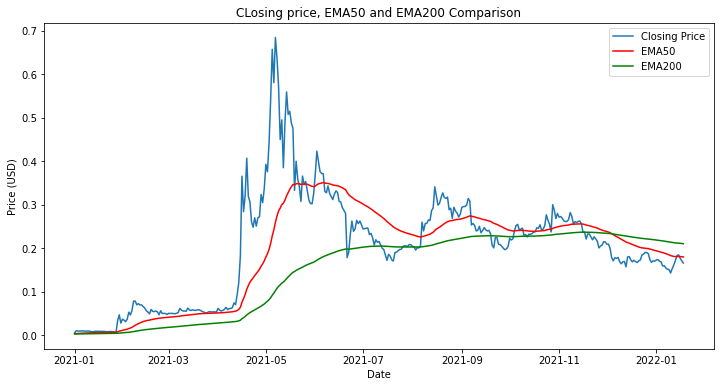

In [22]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label="Closing Price")    # blue color fro closing price
plt.plot(df['EMA50'], label='EMA50', color='r')   # red color for EMA50
plt.plot(df['EMA200'], label="EMA200", color='g')  # green color for EMA200
plt.title("CLosing price, EMA50 and EMA200 Comparison")
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

<big>As we see from above, both EMA50 and EMA200 are correct. So now we are ready to continue with the second part of this notebook</big>

## Part 2: DogeCoin Analysis and Visualization
<big>In this part, we try to visually present the financial history of Doge, by creating plots that show how opening and closing price change based on date, what the higher and lower price for a given day
is, how the difference between opening and closing price grows over time, etc. It is important though, to note that based on the previous diagramm the price of Doge is always less than a dollar, which leads us to assume that the fluctuations of the diagramms will be small. Also, since until 2021 the price was close to 0, we will constrain the analysis in the year 2021-2022.</big>

In [21]:
# first we extract the dates we need  from the original dataframe
df = df['2021-01-01':]
df.head()  # just to check that everything is as we want

,Open,High,Low,Close,Volume,EMA50,EMA200
Date,,,,,,,
2021-01-01,0.004681,0.005685,0.004615,0.005685,228961515,0.003788,0.003131
2021-01-02,0.005686,0.013698,0.005584,0.010615,3421562680,0.004056,0.003206
2021-01-03,0.010602,0.013867,0.009409,0.009771,2707003608,0.004280,0.003271
2021-01-04,0.009785,0.011421,0.007878,0.009767,1372398979,0.004495,0.003336
2021-01-05,0.009767,0.010219,0.008972,0.009920,687256067,0.004708,0.003401


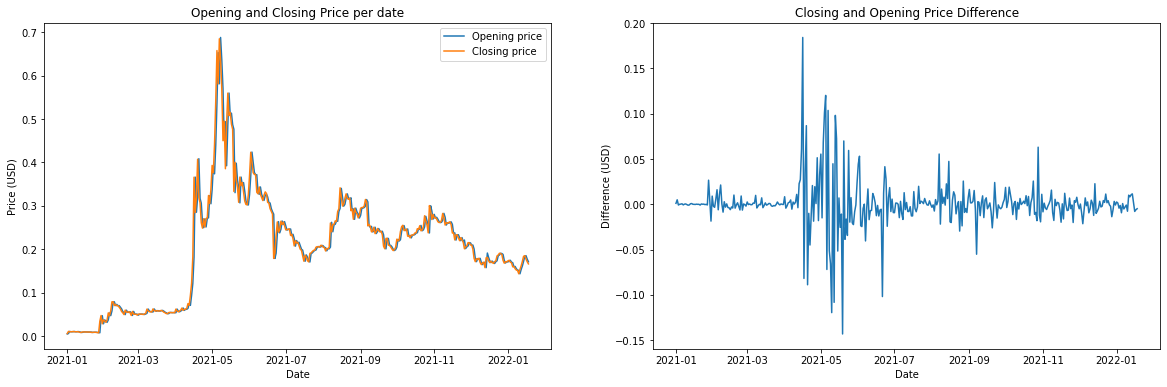

In [30]:
# now that we have the desired df, we can start by creating a plot for opening and closing price
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(20,6))  # split the figure in 2 subplots

# for the first plot
ax1.plot(df['Open'], label="Opening price")
ax1.plot(df['Close'], label="Closing price")
ax1.set_xlabel('Date')
ax1.set_ylabel("Price (USD)")
ax1.legend()
ax1.set_title("Opening and Closing Price per date")

# for the second plot, we will represent the difference of opening and closing price
ax2.plot(df['Close'] - df['Open'])
ax2.set_xlabel("Date")
ax2.set_ylabel("Difference (USD)")
ax2.set_title("Closing and Opening Price Difference")

plt.show()

<big>As we can see, there isn't much difference between opening and closing price of Doge, and themaximum of that difference is about 0.18 USD.
Now, we will do the same diagramms for lowest and highest price, although the results should be much different from the above (for the first diagramm). For the second diagramm, since highest price is always
bigger or equal to lowest price, we expect a positive curve.</big>

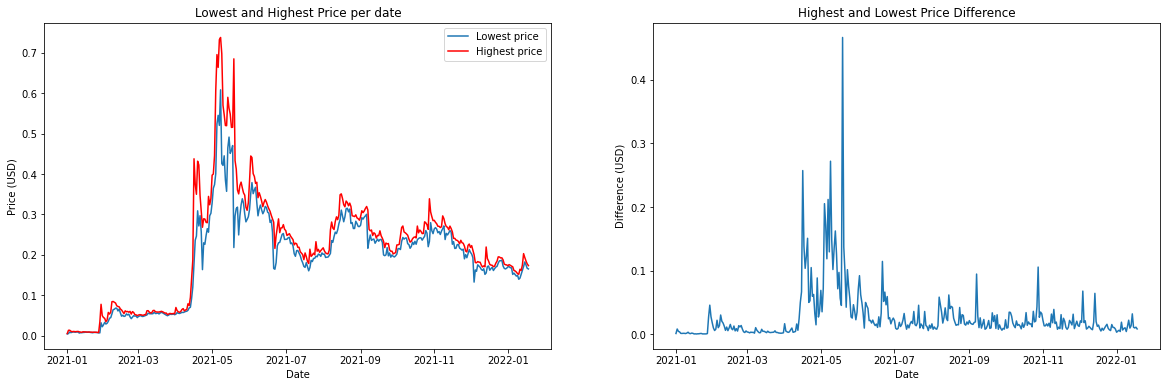

In [31]:
# again, we will create two subplots
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(20,6))  

# for the first plot
ax1.plot(df['Low'], label="Lowest price")
ax1.plot(df['High'], label="Highest price", color='r')  # highest price with red color
ax1.set_xlabel('Date')
ax1.set_ylabel("Price (USD)")
ax1.legend()
ax1.set_title("Lowest and Highest Price per date")

# for the second plot, we will represent the difference of opening and closing price
ax2.plot(df['High'] - df['Low'])
ax2.set_xlabel("Date")
ax2.set_ylabel("Difference (USD)")
ax2.set_title("Highest and Lowest Price Difference")

plt.show()

In [35]:
print("Maximum differene between Highest and Lowest price is:", max(df['High']-df['Low']))  # to see the greatest difference between lowest and highest price of Doge

Maximum differene between Highest and Lowest price is: 0.466468


<big>The above diagramms, show exactly what we expected: Small difference (in USD) between highest and lowest price. However, the maximum of that difference is almost 0.5 dollars, which is actually big
    enough for the scale of Doge price. If we consider that Doge never reached 1 dollar, this means that the maximum difference is little more than 50% of the price.</big>

<big>Now we will also represent lowest, highest and opening/closing price in the same graph. Since opening and closing price are almost the same, we will use one of them as a representative of both. In the
specific diagramm we will use closing price, but opening price could also be choosen.</big>

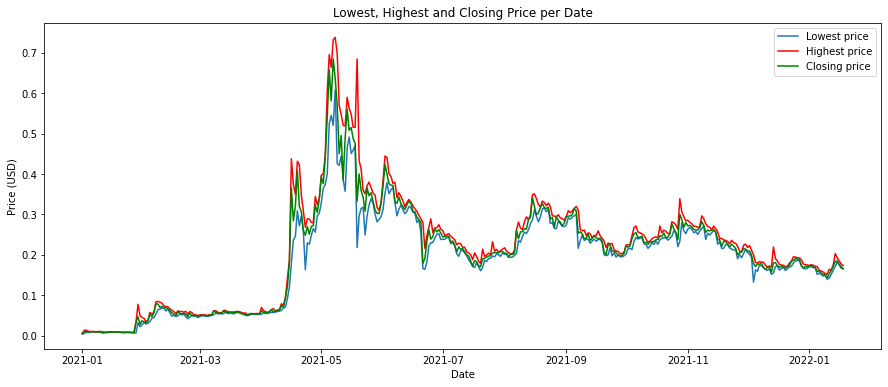

In [39]:
plt.figure(figsize=(15,6))
plt.plot(df['Low'], label="Lowest price")   # blue color for lowest price
plt.plot(df['High'], label="Highest price", color='r')  # red for highest price
plt.plot(df['Close'], label="Closing price", color='g')  # green for closing price
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("Lowest, Highest and Closing Price per Date")
plt.legend()
plt.show()

<big>In this last diagramm, we will show the curve of volume over time, which is an indicator of the investors' interest over the specific coin. Usually, when the volume is high, the coin's price is expected to rise, while
when the volume is low the price is expected to drop. However, volume alone can not be considered as a strong indicator, since other factors such as market capitalization are also important for the future
of a coin (or a stock in general).</big>

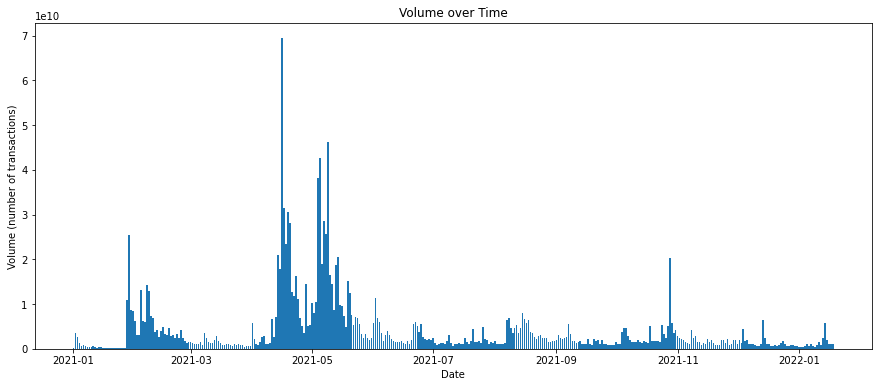

In [42]:
plt.figure(figsize=(15,6))
plt.bar(df.index, df['Volume'])  # generally, volume is represented with bar charts rather than plots
plt.xlabel("Date")
plt.ylabel("Volume (number of transactions)")
plt.title("Volume over Time")
plt.show()

<big>The above diagramm shows that even the highest volume of Doge, was just 7 transactions, which unfortunately indicates that it is a dying coin. This of course is partially expected, since it was indeed
a meme coin that gained popularity just for "fun", while not actually being particularly strong as a cryptocurrency. Although it gained some interest in the middle of 2021, the existence of other coins such 
as BTC and Ether prevented it from growing.</big>